In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")

C:\Users\HP\AppData\Local\Temp\ipykernel_298184\1041966425.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [2]:
# Data Generate X,Y 
def generateDataset(m):
    X = np.random.randn(m)*10
    noise = np.random.randn(m)
    y = 3*X + 1 + 2*noise
    return X,y
     

In [3]:
X,y = generateDataset(100)
print(X.shape,y.shape)

(100,) (100,)


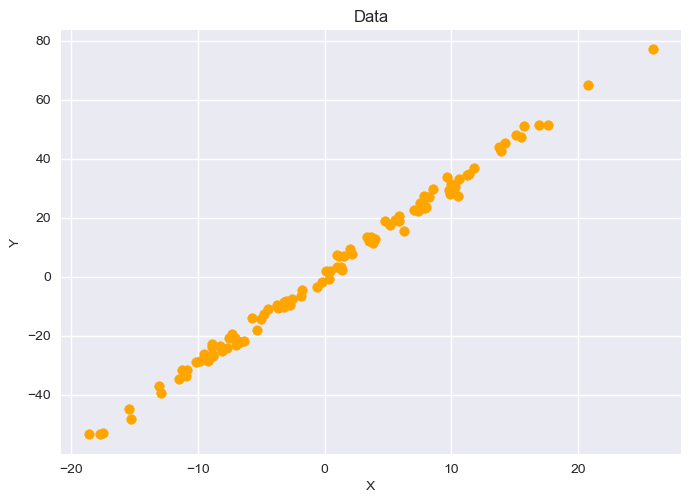

In [4]:
def plotData(X,y,color="orange",title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X,y,c=color)
    plt.show()

plotData(X,y)

In [5]:
def normaliseData(X):
    X = (X-X.mean())/X.std()
    
    return X

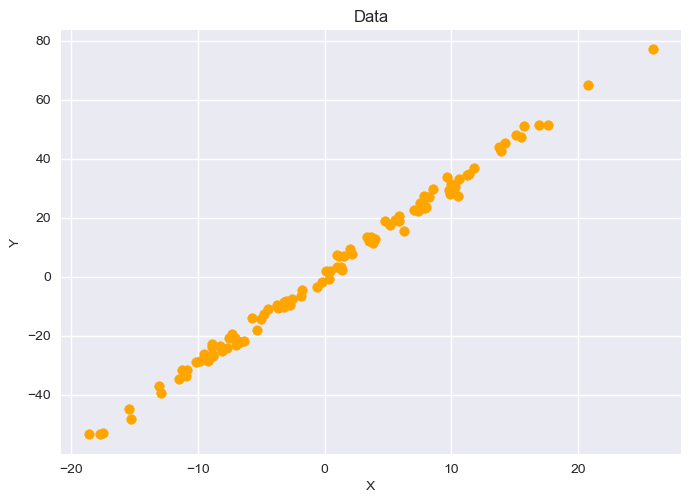

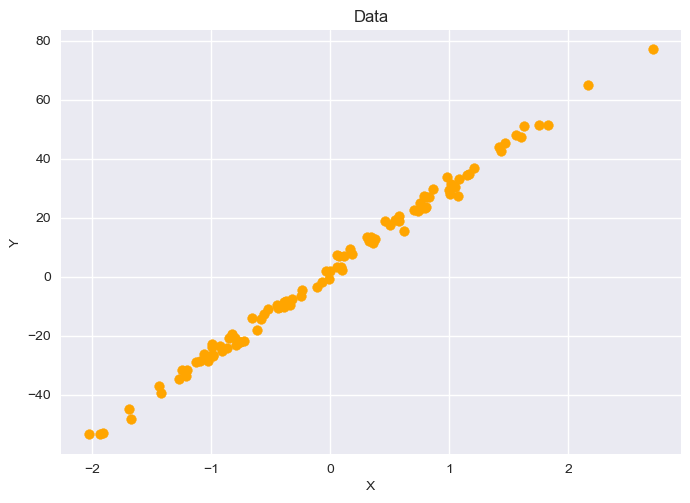

In [6]:
plotData(X,y)
X = normaliseData(X)
plotData(X,y)

In [7]:
# Train Test Split

In [8]:
def trainTestSplit(X,y, split=0.8):
    m = X.shape[0]
    data = np.zeros((m,2))

    data[:,0] = X 
    data[:,1] = y 

    np.random.shuffle(data)

    split = int(m*split)

    XT = data[:split,0] 
    yT = data[:split,1] 

    Xt = data[split: ,0]
    yt = data[split: ,1]

    return XT,yT,Xt,yt 

In [9]:
XT,yT,Xt,yt = trainTestSplit(X,y)

In [10]:
print(XT.shape,yT.shape)
print(Xt.shape,yt.shape)

(80,) (80,)
(20,) (20,)


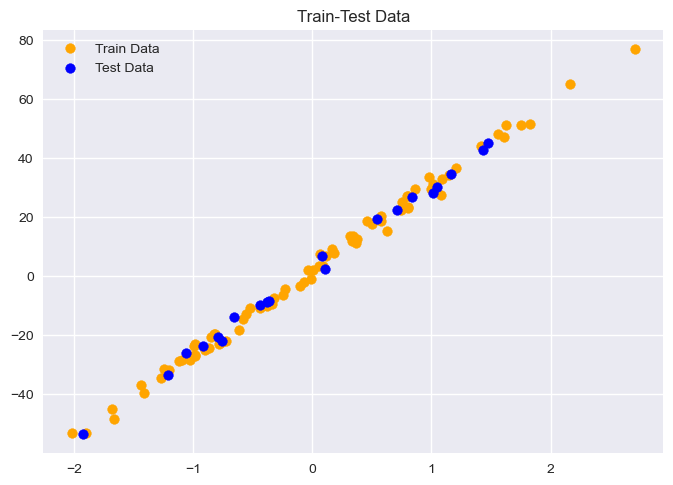

In [11]:
plt.scatter(XT,yT,color='orange',label="Train Data")
plt.scatter(Xt,yt,color='blue',label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [12]:


# Modelling 
def hypothesis(X,theta):
    return theta[0] + theta[1]*X 

def error(X,y,theta):
    m = X.shape[0]
    e = 0 
    for i in range(m):
        y_i = hypothesis(X[i],theta)
        e = e + (y[i] - y_i)**2 
    
    return e/(2*m)

def gradient(X,y,theta):
    m = X.shape[0]
    grad = np.zeros((2,))

    for i in range(m):
        exp = hypothesis(X[i],theta) - y[i]
        grad[0] += (exp) 
        grad[1] += (exp)*X[i]

    return grad/m 


def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    plt.xlabel("Iteration Number")
    plt.ylabel("Loss")
    plt.plot(error_list)
    return theta

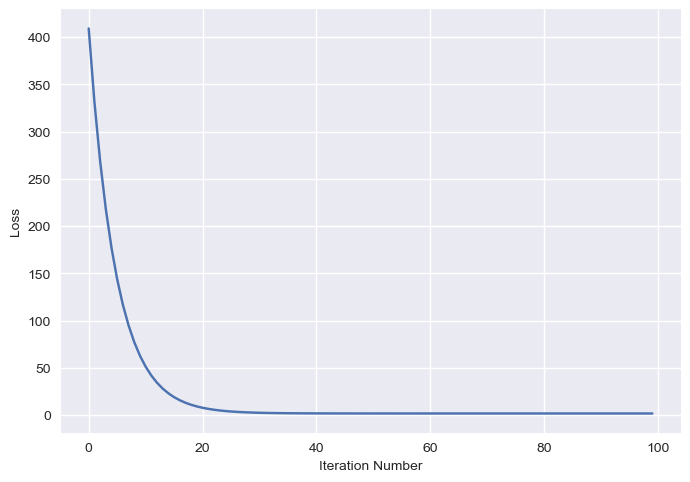

In [13]:
theta = train(X,y)

In [14]:
theta

array([ 2.13475873, 28.4645098 ])

In [15]:
def predict(X,theta):
    return hypothesis(X,theta)


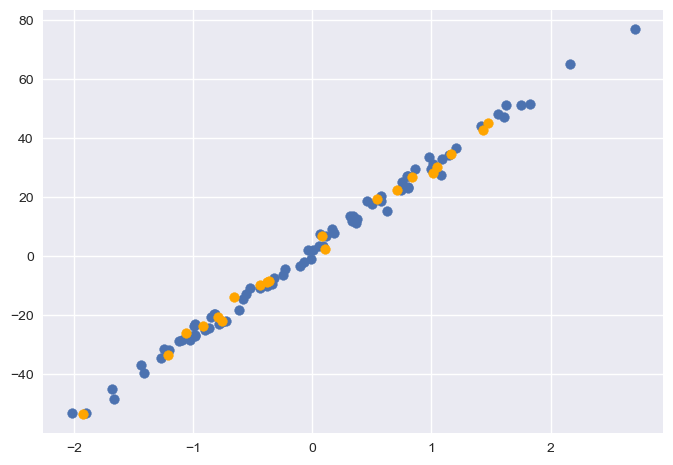

In [16]:
plt.scatter(XT,yT)
plt.scatter(Xt,yt,color='orange')
plt.show()

In [17]:
yp = predict(Xt,theta)

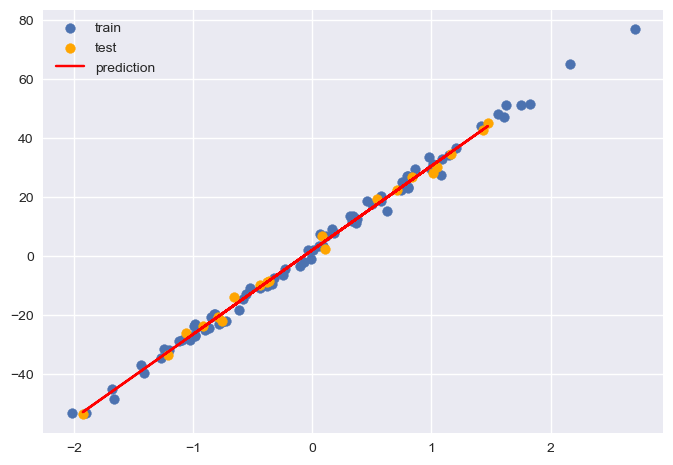

In [18]:
plt.scatter(XT,yT,label="train")
plt.scatter(Xt,yt,color='orange',label="test")
plt.plot(Xt,yp,color='red',label="prediction")
plt.legend()
plt.show()

In [19]:
# Model Evaluation
def r2Score(y,yp):
    ymean = y.mean()
    num = np.sum((y-yp)**2)
    denom = np.sum((y - ymean)**2)
    return 1 - num/denom 

r2Score(yt,yp)

0.9965592099647466

In [20]:
# Visualising the training process

T0 = np.arange(-120,150,10)
T1 = np.arange(-120,150,10)

T0,T1 = np.meshgrid(T0,T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j]*X + T0[i,j]
        J[i,j] = np.mean((y-yp)**2)/2


fig = plt.figure()
axes = fig.gca(projection='3d')
axes.plot_surface(T0,T1,J,cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
plt.show()

TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 800x550 with 0 Axes>

In [ ]:
# Trace the trajectory of gradient 
def train(X,y,learning_rate = 0.1,maxItrs = 100):
    theta = np.array([-150,100])
    error_list = []
    # note down values of theta
    theta_list = []
    
    for i in range(maxItrs):
        grad = gradient(X,y,theta)
        error_list.append(error(X,y,theta))
        theta_list.append((theta[0],theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]

    return theta, theta_list, error_list

In [ ]:
theta, theta_list, error_list = train(XT,yT)

In [ ]:
theta_list = np.array(theta_list)

In [ ]:
fig = plt.figure()
axes = fig.gca(projection='3d')
axes.contour(T0,T1,J,cmap='rainbow')
axes.scatter(theta_list[:,0], theta_list[:,1],error_list)
plt.show()